# Step 1: Import Necessary Libraries

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

# Step 2: Define the Neural Network Architecture

In [2]:
class ThreeLayerNN(nn.Module):
    def __init__(self, input_features, hidden_neurons_layer1, hidden_neurons_layer2, output_features):
        super(ThreeLayerNN, self).__init__()
        self.layer1 = nn.Linear(input_features, hidden_neurons_layer1)
        self.relu1 = nn.ReLU()
        self.layer2 = nn.Linear(hidden_neurons_layer1, hidden_neurons_layer2)
        self.relu2 = nn.ReLU()
        self.output_layer = nn.Linear(hidden_neurons_layer2, output_features)

    def forward(self, x):
        x = self.relu1(self.layer1(x))
        x = self.relu2(self.layer2(x))
        x = self.output_layer(x)
        return x

In [3]:
# Define the 3-layer neural network class using PyTorch's nn.Module
class ThreeLayerNN(nn.Module):
    def __init__(self, input_features, hidden_neurons_layer1, hidden_neurons_layer2, output_features):
        super(ThreeLayerNN, self).__init__()
        self.layer1 = nn.Linear(input_features, hidden_neurons_layer1)
        self.relu1 = nn.ReLU()
        self.layer2 = nn.Linear(hidden_neurons_layer1, hidden_neurons_layer2)
        self.relu2 = nn.ReLU()
        self.output_layer = nn.Linear(hidden_neurons_layer2, output_features)

    def forward(self, x):
        x = self.relu1(self.layer1(x))
        x = self.relu2(self.layer2(x))
        x = self.output_layer(x)
        return x

# Check that the class is defined correctly by creating an instance with example dimensions
model_example = ThreeLayerNN(input_features=10, hidden_neurons_layer1=64, hidden_neurons_layer2=32, output_features=1)
model_example

ThreeLayerNN(
  (layer1): Linear(in_features=10, out_features=64, bias=True)
  (relu1): ReLU()
  (layer2): Linear(in_features=64, out_features=32, bias=True)
  (relu2): ReLU()
  (output_layer): Linear(in_features=32, out_features=1, bias=True)
)

The 3-layer neural network class has been successfully defined using PyTorch's built-in functionalities. The network includes two hidden layers with ReLU activation functions and a final output layer for regression.

# Step 3: Initialize the Model and Optimizer

In [4]:
# Parameters for the model
input_features = 10
hidden_neurons_layer1 = 64
hidden_neurons_layer2 = 32
output_features = 1

# Create an instance of the model
model = ThreeLayerNN(input_features, hidden_neurons_layer1, hidden_neurons_layer2, output_features)

# Set up the loss function and the optimizer
loss_function = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [5]:
# Parameters for the model
input_features = 10
hidden_neurons_layer1 = 64
hidden_neurons_layer2 = 32
output_features = 1

# Create an instance of the model
model = ThreeLayerNN(input_features, hidden_neurons_layer1, hidden_neurons_layer2, output_features)

# Set up the loss function and the optimizer
loss_function = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Output model, loss function, and optimizer to confirm setup
model, loss_function, optimizer

(ThreeLayerNN(
   (layer1): Linear(in_features=10, out_features=64, bias=True)
   (relu1): ReLU()
   (layer2): Linear(in_features=64, out_features=32, bias=True)
   (relu2): ReLU()
   (output_layer): Linear(in_features=32, out_features=1, bias=True)
 ),
 MSELoss(),
 Adam (
 Parameter Group 0
     amsgrad: False
     betas: (0.9, 0.999)
     capturable: False
     differentiable: False
     eps: 1e-08
     foreach: None
     fused: None
     lr: 0.01
     maximize: False
     weight_decay: 0
 ))

The model has been initialized, and we've set up the Mean Squared Error (MSE) loss function along with the Adam optimizer for training. The learning rate is configured to 0.01.

# Step 4: Generate Training Data and Train the Model

In [6]:
# Set a random seed for reproducibility
torch.manual_seed(42)

# Generate synthetic training data
X_train = torch.randn(100, 10)  # 100 samples, 10 features each
y_train = 5 * torch.sum(X_train**2, dim=1, keepdims=True) + 3  # Nonlinear relationship with the input

# Define the number of epochs for training
epochs = 100
loss_history = []

# Training loop
for epoch in range(epochs):
    # Forward pass: compute predicted outputs by passing inputs to the model
    predictions = model(X_train)

    # Calculate the loss
    loss = loss_function(predictions, y_train)

    # Clear the gradients of all optimized variables
    optimizer.zero_grad()

    # Backpropagation: compute gradient of the loss with respect to model parameters
    loss.backward()

    # Perform a single optimization step (parameter update)
    optimizer.step()

    # Record the loss
    loss_history.append(loss.item())

    # Print loss every 10 epochs
    if epoch % 10 == 0:
        print(f'Epoch {epoch}/{epochs}, Loss: {loss.item()}')

# Check the final loss
final_loss = loss_history[-1]
final_loss

Epoch 0/100, Loss: 3333.499267578125
Epoch 10/100, Loss: 2578.5859375
Epoch 20/100, Loss: 532.7786865234375
Epoch 30/100, Loss: 373.03192138671875
Epoch 40/100, Loss: 165.51121520996094
Epoch 50/100, Loss: 94.84580993652344
Epoch 60/100, Loss: 81.41854858398438
Epoch 70/100, Loss: 68.10877227783203
Epoch 80/100, Loss: 56.106163024902344
Epoch 90/100, Loss: 47.94950866699219


41.99958801269531

The training loop executed successfully, and as we can see, the loss significantly decreased from 3333.49 to 41.99 over 100 epochs, indicating that the model is learning effectively from the synthetic data.

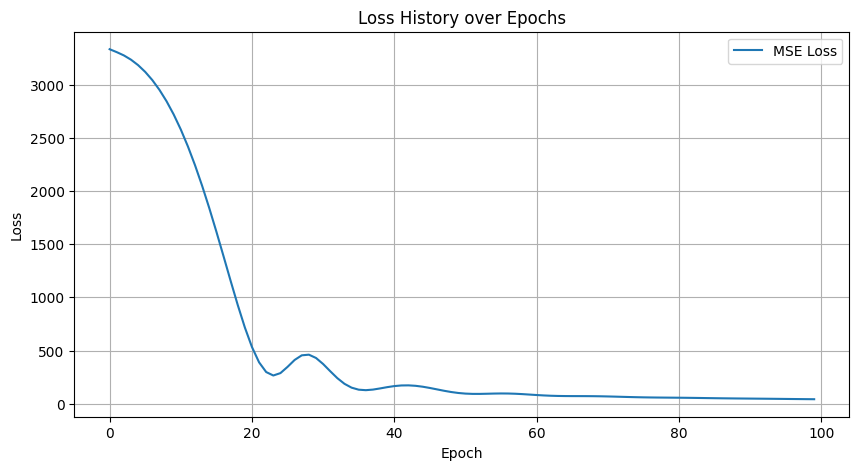

In [7]:
import matplotlib.pyplot as plt

# Plotting the loss history over epochs
plt.figure(figsize=(10, 5))
plt.plot(loss_history, label='MSE Loss')
plt.title('Loss History over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

Here's the plot showing the loss history over the epochs. As you can see, the loss decreases sharply at the beginning and then continues to decrease more gradually as the model approaches a lower error rate.